<a href="https://colab.research.google.com/github/melojrx/data_science/blob/main/Projeto_1_Analisando_os_Dados_do_Airbnb_Toronto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Toronto*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2021, a Startup fundada há 15 anos, já havia **hospedado mais de 1 Bilhão** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb - Toronto" width="60%" src="https://s204818.gridserver.com/wp-content/uploads/2017/09/Toronto-1.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Toronto, e ver quais insights podem ser extraídos a partir de dados brutos.**


	


## Obtenção dos Dados


Todos os dados foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para fins deste projeto, foi baixado o segunte arquivo: 


*   *listings.csv* - Summary information and metrics for listings in Toronto (good for visualisations).

P.s: como a base de dados está em constante evolução e em um dado período a utilização do código pode se tornar inviável pela possível desatualização da base resolvi disponibilizar [aqui](https://raw.githubusercontent.com/melojrx/data_science/main/arbnb/listings.csv) conjunto de dados que utilizei, para que você sempre consiga utilizar esse material.

Então, vamos ao projeto: 



In [ ]:
# importar os pacotes necessarios
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline 


In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/melojrx/data_science/main/arbnb/listings.csv")


## Análise dos Dados


Etapa fundamental que visa a criação de uma consciência situacional inicial permitindo assim o entendimento de como os dados estão estruturados. 

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel em US$
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `license` - Numero de registro/licença/permissão 

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,1419,Beautiful home in amazing area!,1565,Alexandra,NaN,Little Portugal,43.64590,-79.42423,Entire home/apt,469,28,7,2017-12-04,0.09,1,0,0,NaN
1,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64080,-79.37673,Private room,96,180,169,2013-08-27,1.50,2,365,0,NaN
2,23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,NaN,Briar Hill-Belgravia,43.69805,-79.45411,Private room,72,28,217,2018-10-10,1.73,2,365,0,NaN
3,27423,Executive Studio Unit- Ideal for One Person,118124,Brent,NaN,South Riverdale,43.66884,-79.32725,Entire home/apt,45,365,26,2011-06-25,0.21,1,280,0,NaN
4,30931,Downtown Toronto - Waterview Condo,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64015,-79.37625,Entire home/apt,128,180,1,2010-08-11,0.01,2,365,0,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

A ideia central aqui é identificar a quantidade de entradas (linhas) que nosso conjunto de dados possui e ver os tipos de cada coluna (variáveis). 

In [ ]:
# identificar o volume de dados do DataFrame
print('Dimensões do Dataset',
    '\nVariáveis: ',df.shape[1], "\n"
      'Entradas: ', df.shape[0])
# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Dimensões do Dataset 
Variáveis:  18 
Entradas:  15261


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* A variável `license` possui valores nulos em mais da metade das linhas.
* As variáveis `reviews_per_month` e `last_review` têm aproximadamente 22% dos valores nulos.
* Já as colunas `host_name` e `name` os valores ausentes representam menos de 1%.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)


neighbourhood_group               1.000000
license                           0.668632
reviews_per_month                 0.228425
last_review                       0.228425
host_name                         0.000721
name                              0.000066
number_of_reviews                 0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
id                                0.000000
minimum_nights                    0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

Fazendo uma limpeza nos dados. 

O tratamento de valores ausentes requer que saibamos qual nosso objetivo de análise, neste caso, as variáveis *neighbourhood_group*, *license*, *reviews_per_month* e *last_review*, possuem baixo poder preditivo e uma grande quantidade de dados faltantes e podem ser excluídas. 

Valor excluir as entradas: 

In [ ]:
#excluindo colunas com dados faltantes
df.drop(columns=['neighbourhood_group', 'license', 'reviews_per_month',  'last_review'], inplace=True)

#excluindo entradas com dados faltantes
df.dropna(axis=0, inplace=True)

Realizada a limpeza. Vamos conferir os resultados. 

In [ ]:
#verificando o resultado. 
(df.isnull().sum().sort_values(ascending=False))

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Após a limpeza relativa aos dados ausentes podemos verificar a distribuição das variáveis. 

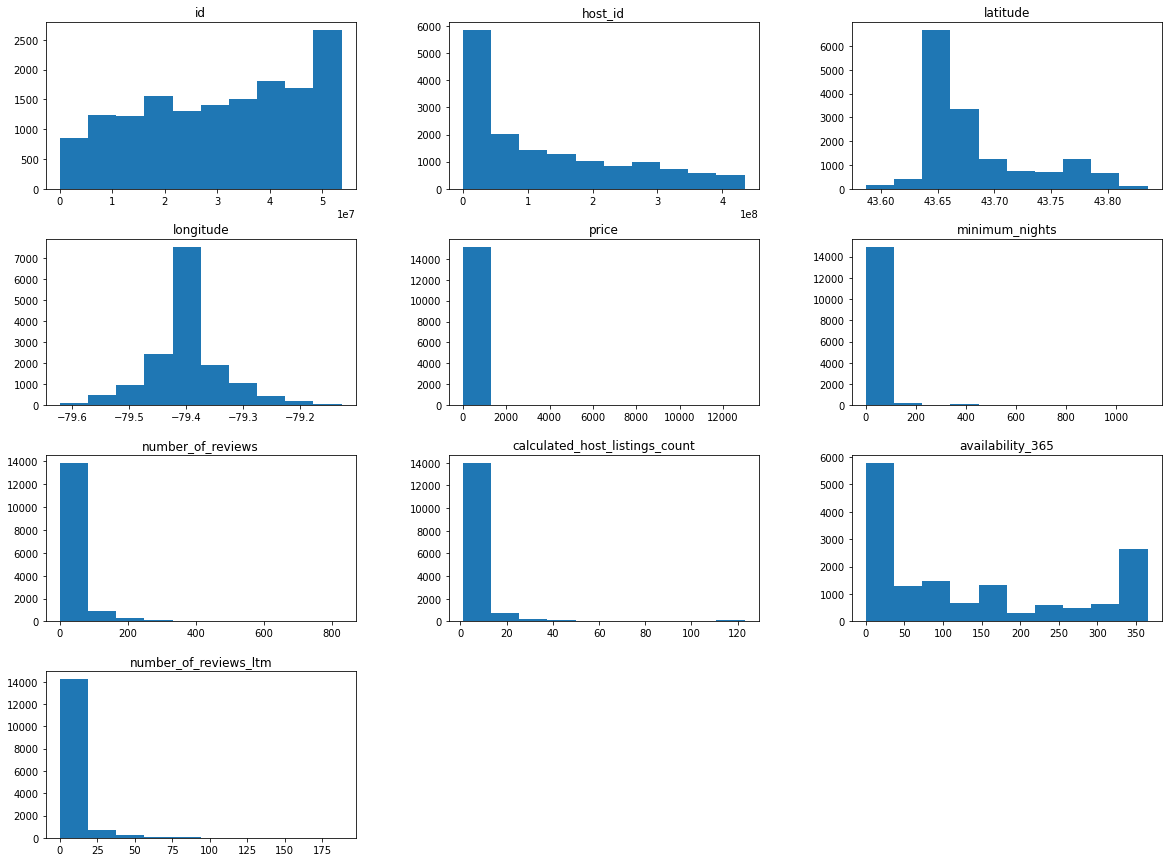

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(figsize=(20,15), grid=False);

### **Q4. Há outliers presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há várias maneiras rápidas que auxiliam a detecção de *outliers*. Para nossa análise iremos **analisar a distribuição estatística**, **plotar boxplots** e **calcular os limites utilizando a regra do IQR Score**.

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.
* calcular os limites utilizando a regra do IQR Score. 

In [ ]:
# ver o resumo estatístico das variáveis numéricas
df.describe().round(1)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15249.0,15249.0,15249.0,15249.0,15249.0,15249.0,15249.0,15249.0,15249.0,15249.0
mean,30913202.1,124915905.4,43.7,-79.4,155.5,26.3,26.2,5.2,131.6,4.2
std,15614346.8,121624233.9,0.0,0.1,371.3,40.2,53.5,13.1,135.0,11.2
min,1419.0,1565.0,43.6,-79.6,0.0,1.0,0.0,1.0,0.0,0.0
25%,18373549.0,22541363.0,43.6,-79.4,67.0,5.0,1.0,1.0,0.0,0.0
50%,32508227.0,79920634.0,43.7,-79.4,101.0,28.0,5.0,1.0,87.0,0.0
75%,44513457.0,209314766.0,43.7,-79.4,165.0,28.0,26.0,4.0,251.0,3.0
max,53684479.0,434447617.0,43.8,-79.1,13000.0,1125.0,828.0,123.0,365.0,188.0


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável *price* tem o mínimo em 0. 
* A variável *price* trata o preço da diária em moeda local(USD), 75% dos valores está abaixo de 165 dólares, mas o máximo está em 13 mil doláres. Temos flagrante presença de *outliers* aqui.  
* A quantidade mínima de noites (minimum_nights) está acima de 365 dias no ano, também temos clara presença de *outliers* nesta variável. 



## Limpando Outliers

Primeiramente, vamos lembrar o que é o IQR.

O IQR é calculado subtraindo o Terceiro Quartil (75%) pelo Primeiro Quartil (25%).

# IQR = Q3 - Q1

Verificando os histogramas e o resumo estatístico através da função *describe()* conseguimos ver claramente que temos outliers presentes. Para tratá-los vamos seguir os seguintes passos:

Definir o Q1 e Q3 para as variáveis que serão limpas.
Calcular o IQR para as variáveis.
Definir o limite superior e inferior para cortar os outliers.
Remover os outliers.


In [ ]:
#Identificando outliers para a variável price
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR da variável price: ', IQR_price)

# definindo os limites                                       
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Limite superior de price: ', sup_price)
print('Limite inferior de price: ', inf_price)

IQR da variável price:  98.0
Limite superior de price:  312.0
Limite inferior de price:  -80.0


Aqui podemos ver que, apesar de não termos outliers na parte inferior, continuamos tendo valores iguais a zero, que precisam ser tratados.

Vamos plotar um boxplot para visualizarmos a diferença feita pela limpeza.

#### Blotspot para price

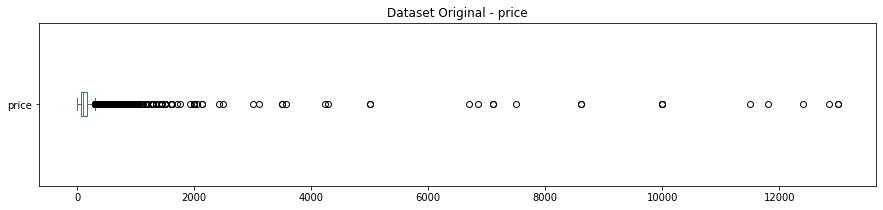

O dataset possui 15249 colunas
982 Entradas acima de 312.0
Representam 6.44% do dataset


In [ ]:
# price
fig, ax = plt.subplots(figsize=(15,3))
df.price.plot(kind='box', vert=False);
ax.set_title('Dataset Original - price')
plt.show()
print("O dataset possui {} colunas".format(df.shape[0]))
print("{} Entradas acima de 312.0".format(len(df[df.price > 312.])))
print("Representam {:.2f}% do dataset".format((len(df[df.price > 312.0]) / df.shape[0])*100))

In [ ]:
# identificando os outliers para a variável minimum_nights
q1_minimum_nights = df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR da variável minimum_nights: ', IQR_minimum_nights)

# definindo os limites                                       
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Limite superior de minimum_nights: ', sup_minimum_nights)
print('Limite inferior de minimum_nights: ', inf_minimum_nights)

IQR da variável minimum_nights:  23.0
Limite superior de minimum_nights:  62.5
Limite inferior de minimum_nights:  -29.5


#### Blotspot para minimum_nights

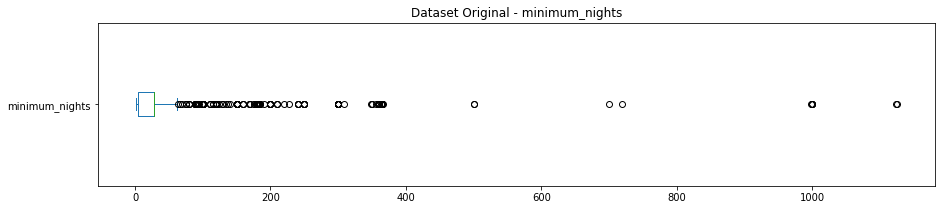

O dataset possui 15249 colunas
515 Entradas acima de 62.5
Representam 3.38% do dataset


In [ ]:
# minimum_nights
fig, ax = plt.subplots(figsize=(15,3))
df.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Dataset Original - minimum_nights')
plt.show()
print("O dataset possui {} colunas".format(df.shape[0]))
print("{} Entradas acima de 62.5".format(len(df[df.minimum_nights > 62.5])))
print("Representam {:.2f}% do dataset".format((len(df[df.minimum_nights > 62.5]) / df.shape[0])*100))

In [ ]:
# limpando o dataset
df_clean = df.copy()

df_clean.drop(df_clean[df_clean.price > 312.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 62.5].index, axis=0, inplace=True)

print('Shape antes da limpeza: ', df.shape)
print('Shape após a limpeza: ',df_clean.shape)

Shape antes da limpeza:  (15249, 14)
Shape após a limpeza:  (13779, 14)


## Verificando o conjunto após a limpeza

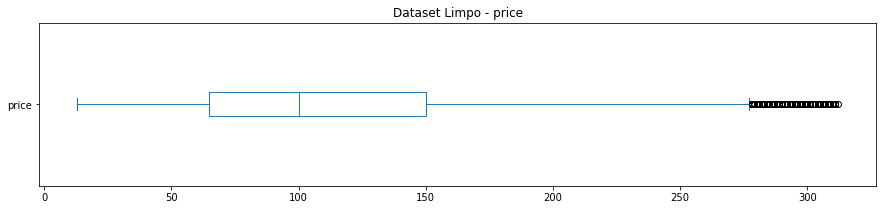

Tamanho original: 15249 colunas
Tamanho atual: 13779 colunas


In [ ]:
fig, ax = plt.subplots(figsize=(15,3))
df_clean.price.plot(kind='box', vert=False);
ax.set_title('Dataset Limpo - price')
plt.show()
print("Tamanho original: {} colunas".format(df.shape[0]))
print("Tamanho atual: {} colunas".format(df_clean.shape[0]))

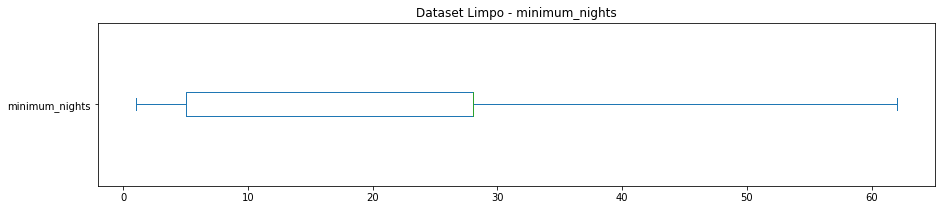

Tamanho original: 15249 colunas
Tamanho atual: 13779 colunas


In [ ]:
fig, ax = plt.subplots(figsize=(15,3))
df_clean.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Dataset Limpo - minimum_nights')
plt.show()
print("Tamanho original: {} colunas".format(df.shape[0]))
print("Tamanho atual: {} colunas".format(df_clean.shape[0]))

#### Histogramas sem *outliers*

Para garantirmos que não estamos lidando com outliers que vão prejudicar nossa análise, vamos checar os histogramas novamente.

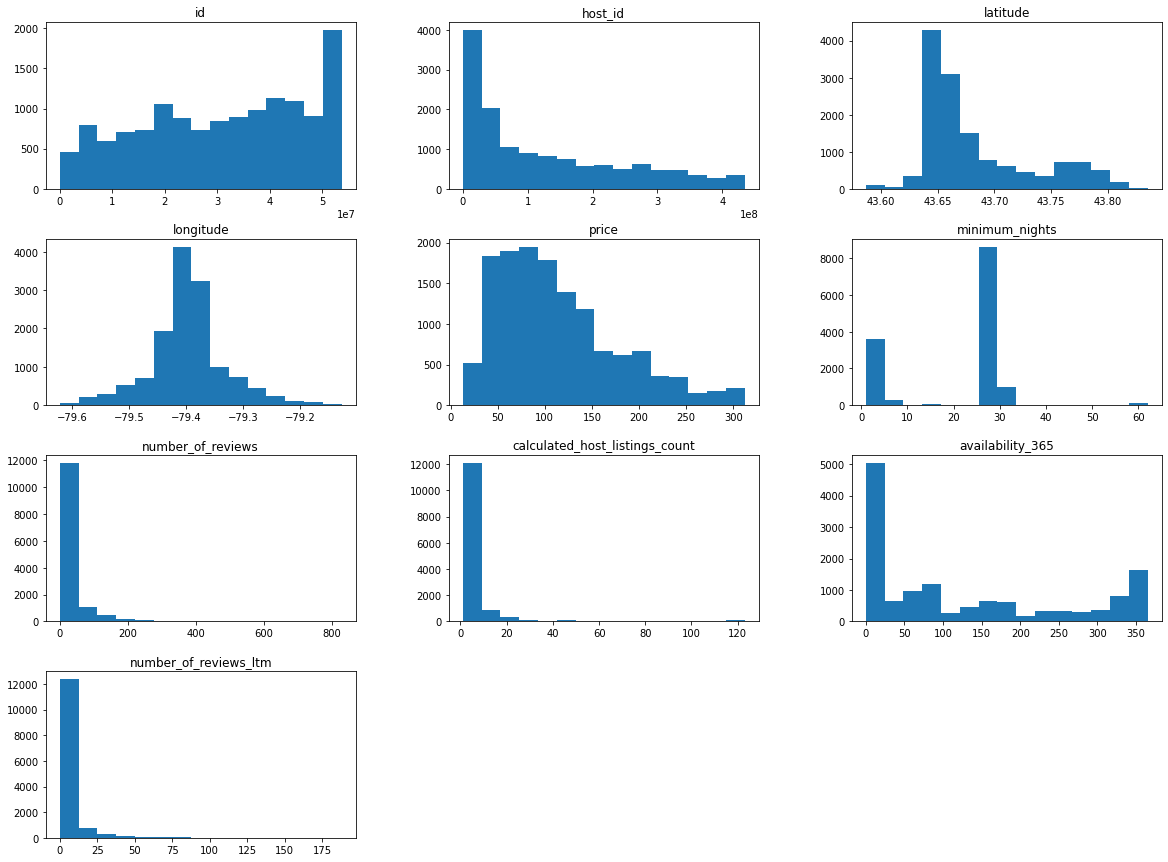

In [ ]:
# Verificando as distribuições
df_clean.hist(bins=15, figsize=(20,15), grid=False);

#### Verificando a distribuição estatística dos dados limpos

In [ ]:
# Verificando a distribuição estatística dos dados limpos
df_clean.describe().round(1)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,13779.0,13779.0,13779.0,13779.0,13779.0,13779.0,13779.0,13779.0,13779.0,13779.0
mean,31081098.1,125795088.3,43.7,-79.4,114.0,21.2,27.0,5.3,126.5,4.4
std,15574757.9,121852690.1,0.0,0.1,64.5,12.3,54.6,13.5,133.4,11.6
min,23691.0,14135.0,43.6,-79.6,13.0,1.0,0.0,1.0,0.0,0.0
25%,18628440.5,22794425.0,43.6,-79.4,65.0,5.0,1.0,1.0,0.0,0.0
50%,32724418.0,81126924.0,43.7,-79.4,100.0,28.0,6.0,1.0,80.0,0.0
75%,44643999.5,210754738.0,43.7,-79.4,150.0,28.0,27.0,4.0,242.0,3.0
max,53684479.0,434447617.0,43.8,-79.1,312.0,62.0,828.0,123.0,365.0,188.0


### **Q5. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price``
df_clean.price.mean()

113.9788809057261

### **Q6. Qual a correlação existente entre as variáveis**

Correlação é qualquer relação dentro de uma ampla classe de relações estatísticas que envolva dependência entre duas variáveis. Em nosso contexto procuramos semelhanças, relação entre as variáveis. 

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, então, vamos: 

*   Criar uma matriz de correlação
*   Gerar um heatmap a partir dessa matriz, usando a biblioteca *seaborn*


In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
price,1.000000,-0.117718,0.031836,0.046761,0.033851
minimum_nights,-0.117718,1.000000,-0.204885,0.037679,-0.101537
number_of_reviews,0.031836,-0.204885,1.000000,-0.070503,0.016190
calculated_host_listings_count,0.046761,0.037679,-0.070503,1.000000,0.149269
availability_365,0.033851,-0.101537,0.016190,0.149269,1.000000


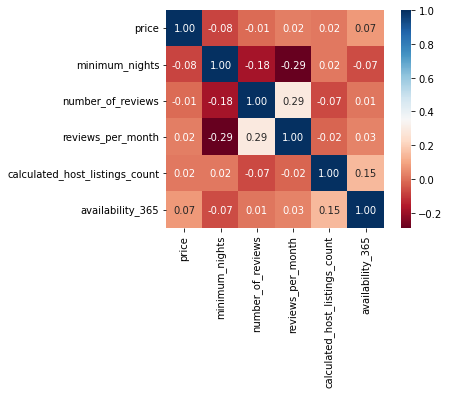

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    8783
Private room       4795
Shared room         184
Hotel room           17
Name: room_type, dtype: int64

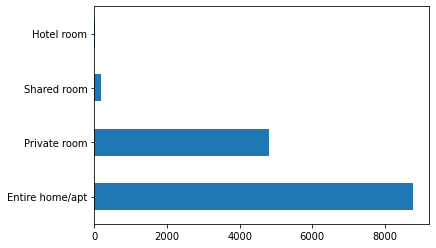

In [ ]:
#representando graficamente os imóveis mais alugados. 
df_clean.room_type.value_counts().plot(kind='barh');

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df.shape[0] * 100

Entire home/apt    57.597219
Private room       31.444685
Shared room         1.206637
Hotel room          0.111483
Name: room_type, dtype: float64

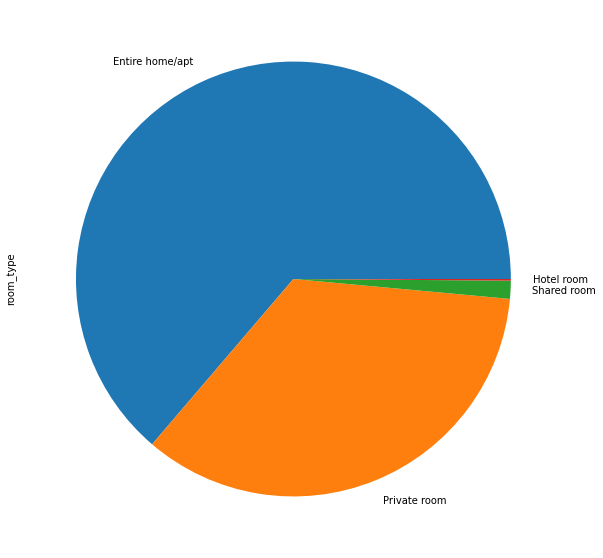

In [ ]:
(df_clean.room_type.value_counts() / df.shape[0] * 100).plot(kind='pie', figsize=(10,10))

### **Q8. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Waterfront Communities-The Island    160.003916
Niagara                              142.675097
Bay Street Corridor                  140.085859
Bridle Path-Sunnybrook-York Mills    137.000000
Casa Loma                            131.422222
Rosedale-Moore Park                  130.615385
Yonge-Eglinton                       127.770492
Annex                                127.445946
The Beaches                          127.041322
Runnymede-Bloor West Village         126.447368
Name: price, dtype: float64

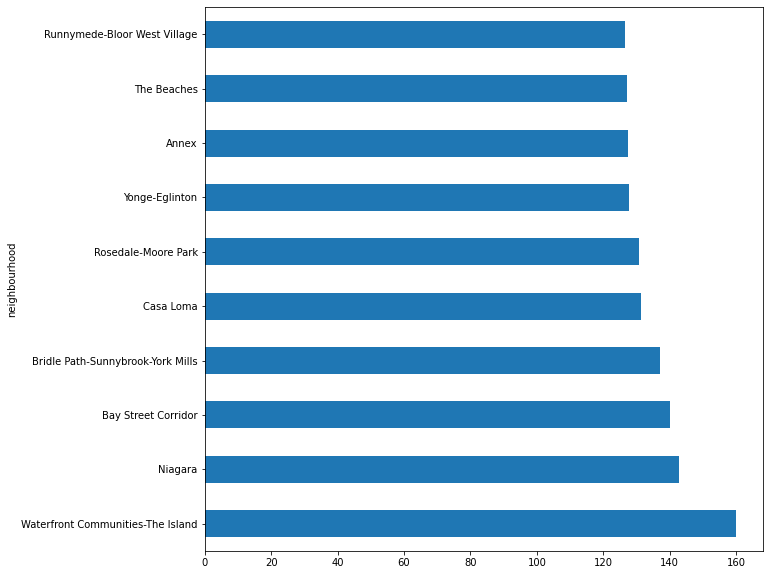

In [ ]:
# ver preços por bairros, na média, graficamente. 
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10].plot(kind='barh', figsize=(10,10))

### **Q9. Preços por tipo de acomodação.**

In [ ]:
# ver preços por tipo de acomodacao, na média
df_clean.groupby(['room_type','neighbourhood']).price.mean().sort_values(ascending=False)[:10]

room_type        neighbourhood                    
Shared room      Bendale                              300.000000
                 Dorset Park                          194.000000
Entire home/apt  Agincourt North                      169.000000
                 Waterfront Communities-The Island    163.775561
                 Bridle Path-Sunnybrook-York Mills    163.000000
                 Bay Street Corridor                  152.340836
                 Willowdale East                      152.175824
                 Niagara                              151.835240
                 Casa Loma                            150.181818
                 Rosedale-Moore Park                  149.631579
Name: price, dtype: float64

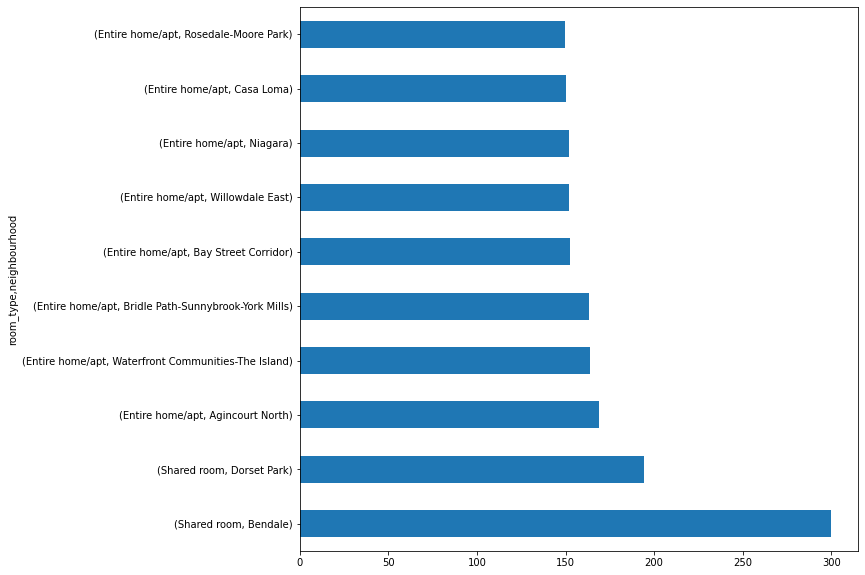

In [ ]:
# ver preços por tipo de acomodacao, na média
df_clean.groupby(['room_type','neighbourhood']).price.mean().sort_values(ascending=False)[:10].plot(kind='barh', figsize=(10,10))

### **Q10. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

21.171492851440597

### **Q11. Gráfico de densidade dos imóveis por geolocalização.** 

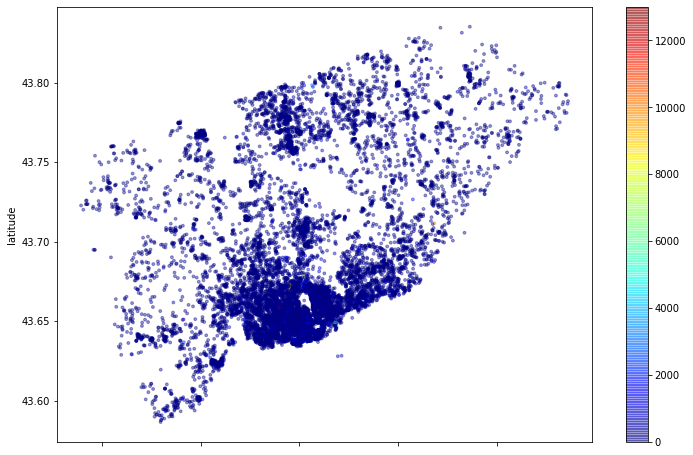

In [ ]:
# plotar os imóveis pela latitude-longitude
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões


A cidade escolhida para uma análise prelimitar, Toronto no Canadá, é a maior cidade e maior centro financeiro do Canadá, além de ser a capital da província canadense de Ontário.

É a quarta cidade mais populosa da América do Norte depois da Cidade do México, Nova York e Los Angeles.

A cidade abriga cerca de 9,2 milhões de pessoas, ou mais de 26% da população do Canadá. Uma cidade global, Toronto é um centro internacional de negócios, finanças, arte, cultura, qualidade de vida e segurança. Em 2017, Toronto foi considerada pelo The Economist a quarta melhor cidade do mundo para se viver e uma das cidades mais seguras do Canadá e do continente americano.

Foi feita uma análise superficial na base de dados do Airbnb e já foi possível perceber que existem *outliers* em algumas variáveis. Foi possível, didaticamente, aplicar as técnicas auxiliares para identificação e limpeza de dados, como o IQR Score (Interquatile Range), aplicação do método *describe()* para visualização dos parâmetros estatísticos das variáveis assim como a plotagem de bloxplot das variáveis com necessidade de tratamento. 

Após a limpeza e tratamento dos dados podemos realizar diversas análises importantes como saber qual a média dos preços de alugueis na cidade, o tipo de imóvel mais alugado, a localidade mais cara do *dataset* ou mesmo a média do mínimo de noites disponíveis para alugar. 

Por fim, através dos dados disponíveis de latitude e longitude somos capazes de plotar o gráfico de densidade dos imóveis da cidade por geolocalização, o que nos permite verificar a distribuição dos imóveis pelo território da cidade. 

São informações e inferências relevantes seja para quem pretente conhecer a cidade ou mesmo para efeitos didáticos de estudos em ciência de dados. 

Finalmente, é importante salientar que este *dataset* é uma versão resumida, ideal para abordagens iniciais. O conjunto de dados original e sua versão estendida está disponível no site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).



